In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This will likely need to change everytime if your path looks different to mine... thats annoying

In [2]:
PATH_TO_PROJECT = '/content/drive/Othercomputers/My MacBook Pro/GitHub/FAERS-analytics'

In [6]:
%cd $PATH_TO_PROJECT

/content/drive/Othercomputers/My MacBook Pro/GitHub/FAERS-analytics


In [7]:
!ls

 data   data-out   DEMO23Q3.txt  'FAERS analytics.ipynb'   README.md


In [8]:
import os

output_path_dir = 'data-out/'
input_path_dir = 'data/'

if not os.path.isdir(output_path_dir):
  !mkdir $output_path_dir

for file in os.listdir(input_path_dir):
  if file.endswith(".zip"):
    input_path_file = input_path_dir + file
    output_path_file = output_path_dir + file.split('.zip')[0]
    if not os.path.isdir(output_path_file):
      !mkdir $output_path_file
      !unzip $input_path_file -d $output_path_file

In [9]:
!ls $output_path_dir

FAERS_ASCII_2023_Q3  FAERS_ASCII_2023_Q4


In [10]:
q3_dir = output_path_dir + 'FAERS_ASCII_2023_Q3/ASCII/'
!ls $q3_dir

ASC_NTS.pdf   DRUG23Q3.pdf  INDI23Q3.txt  REAC23Q3.pdf	RPSR23Q3.txt
DEMO23Q3.pdf  DRUG23Q3.txt  OUTC23Q3.pdf  REAC23Q3.txt	THER23Q3.pdf
DEMO23Q3.txt  INDI23Q3.pdf  OUTC23Q3.txt  RPSR23Q3.pdf	THER23Q3.txt


In [11]:
q4_dir = output_path_dir + 'FAERS_ASCII_2023_Q4/ASCII/'
!ls $q4_dir

ASC_NTS.pdf   DRUG23Q4.pdf  INDI23Q4.txt  REAC23Q4.pdf	RPSR23Q4.txt
DEMO23Q4.pdf  DRUG23Q4.txt  OUTC23Q4.pdf  REAC23Q4.txt	THER23Q4.pdf
DEMO23Q4.txt  INDI23Q4.pdf  OUTC23Q4.txt  RPSR23Q4.pdf	THER23Q4.txt


In [12]:
import pandas as pd

data = {}
directories = [q3_dir, q4_dir]


for directory in directories:
  for file in os.listdir(directory):
    if file.endswith(".txt"):
      input_path_file = './' + directory + file
      output_data_frame_name = file.split('.txt')[0]
      output_data_frame = pd.read_csv(input_path_file, sep='$')
      data[output_data_frame_name] = output_data_frame

data.keys()


<ipython-input-12-1f57bd4ffc9c>:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  output_data_frame = pd.read_csv(input_path_file, sep='$')
<ipython-input-12-1f57bd4ffc9c>:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  output_data_frame = pd.read_csv(input_path_file, sep='$')


dict_keys(['THER23Q3', 'RPSR23Q3', 'DRUG23Q3', 'REAC23Q3', 'INDI23Q3', 'OUTC23Q3', 'DEMO23Q3', 'THER23Q4', 'DRUG23Q4', 'RPSR23Q4', 'REAC23Q4', 'INDI23Q4', 'OUTC23Q4', 'DEMO23Q4'])

In [13]:
for df_name, df in data.items():
    print('Current Table Name: ' + df_name)
    print('Current Table Shape: ' + str(df.shape))
    print('Current Table Snippet: \n')
    print(df.head())
    print ('\n\n -------------------------------------------------------------------------- \n\n')

Current Table Name: THER23Q3
Current Table Shape: (593027, 7)
Current Table Snippet: 

    primaryid    caseid  dsg_drug_seq    start_dt      end_dt     dur dur_cod
0   100051542  10005154             1  20120215.0         NaN     NaN     NaN
1  1001678123  10016781             1    201201.0    201204.0     NaN     NaN
2  1001678123  10016781             4  20120327.0         NaN     NaN     NaN
3  1001678123  10016781            10  20121005.0  20200121.0  2665.0     DAY
4  1001678123  10016781            12         NaN  20200121.0     NaN     NaN


 -------------------------------------------------------------------------- 


Current Table Name: RPSR23Q3
Current Table Shape: (11524, 3)
Current Table Snippet: 

   primaryid    caseid rpsr_cod
0  226642531  22664253       HP
1  226652471  22665247       HP
2  226653301  22665330      CSM
3  226653571  22665357      CSM
4  226655061  22665506      CSM


 -------------------------------------------------------------------------- 


Curre

In [14]:
!pip install pandasql
import pandasql as ps

In [62]:
demo23Q3=data['DEMO23Q3']
demo23Q4=data['DEMO23Q4']
reac23Q3=data['REAC23Q3']
reac23Q4=data['REAC23Q4']
rpsr23Q3=data['RPSR23Q3']
rpsr23Q4=data['RPSR23Q4']
demo_append = demo23Q3.append(demo23Q4, ignore_index=True).drop_duplicates()
reac_append = reac23Q3.append(reac23Q4, ignore_index=True).drop_duplicates()
rpsr_append = rpsr23Q3.append(rpsr23Q4, ignore_index=True).drop_duplicates()

<ipython-input-62-03c8330003bb>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demo_append = demo23Q3.append(demo23Q4, ignore_index=True).drop_duplicates()
<ipython-input-62-03c8330003bb>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reac_append = reac23Q3.append(reac23Q4, ignore_index=True).drop_duplicates()
<ipython-input-62-03c8330003bb>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rpsr_append = rpsr23Q3.append(rpsr23Q4, ignore_index=True).drop_duplicates()


In [40]:
demo_append['caseid'].count()



822901

In [39]:
demo_append[demo_append['i_f_code']=='I']['caseid'].count()

551227

In [65]:
demo_append['caseid'].nunique()

798340

In [52]:
#demo_append
latest_records_idx = demo_append.groupby('caseid')['event_dt'].idxmax()
latest_records_idx
#latest_records = demo_append.loc[latest_records_idx]

caseid
4081562     407386.0
4150515     822764.0
5797343          NaN
6006581          NaN
6359478          NaN
              ...   
23360950    822759.0
23360954         NaN
23360973         NaN
23369982    822762.0
23369984    822763.0
Name: event_dt, Length: 798340, dtype: float64

In [58]:
demo_append.groupby('caseid')['caseversion'].agg('count').sort_values()

caseid
4081562     1
23076744    1
23076745    1
23076746    1
23076747    1
           ..
21210138    2
22915446    2
22958222    2
22781202    2
22198932    2
Name: caseversion, Length: 798340, dtype: int64

In [59]:
demo_append[demo_append['caseid']==22958222]

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country
358043,229582221,22958222,1,I,20230913.0,20230913.0,20230919,20230919,PER,NaN,...,E,F,Y,NaN,NaN,20230919,NaN,MD,US,US
489055,229582222,22958222,2,F,20230913.0,20231115.0,20230919,20231128,PER,NaN,...,E,F,Y,NaN,NaN,20231128,NaN,MD,US,US


In [60]:
joined_df1 = demo_append.merge(reac_append , how='inner', on='primaryid')
# Grouping by 'key_column' and summing 'value1' and 'value2'
grouped_df = joined_df1.groupby('pt').size().reset_index(name='counts')
sorted_group_sizes1 = grouped_df.sort_values(by='counts', ascending=False)
print(sorted_group_sizes1)

                               pt  counts
9303                Off label use   65622
4019             Drug ineffective   57542
4875                      Fatigue   45327
3666                   Dependence   45049
3560                        Death   36619
...                           ...     ...
12358              Spleen atrophy       1
12360            Spleen contusion       1
5178   Gallbladder adenocarcinoma       1
9864          Patella replacement       1
12750            Systemic leakage       1

[14336 rows x 2 columns]


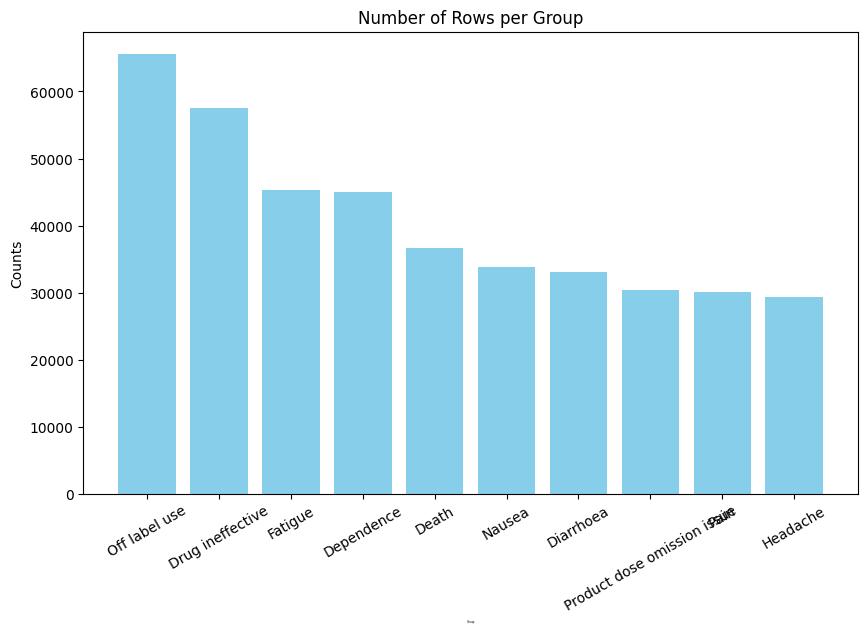

In [61]:
import matplotlib.pyplot as plt
plot_data = sorted_group_sizes1.head(10)
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
plt.bar(plot_data['pt'], plot_data['counts'], color='skyblue')
plt.xlabel('Group',  fontsize=2)
plt.ylabel('Counts')
plt.title('Number of Rows per Group')
plt.xticks(rotation=30)  # Rotate labels to make them readable if necessary
plt.show()

In [68]:
joined_df2 = demo_append[demo_append['i_f_code']=='I'].merge(rpsr_append , how='inner', on='primaryid')
# Grouping by 'key_column' and summing 'value1' and 'value2'
grouped_df = joined_df2.groupby('rpsr_cod').size().reset_index(name='counts')
sorted_group_sizes2 = grouped_df.sort_values(by='counts', ascending=False)
print(sorted_group_sizes2)

  rpsr_cod  counts
2       HP   17363
0      CSM    7245
1      FGN     153
3      LIT       1


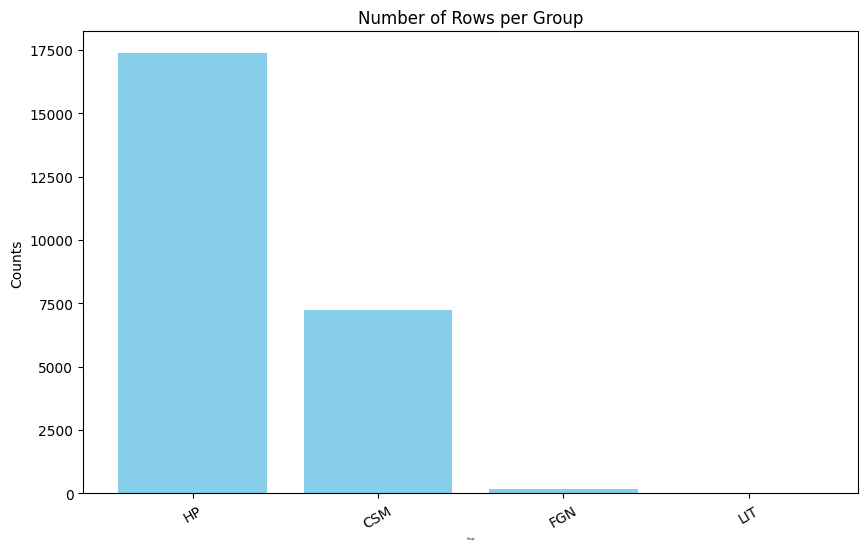

In [70]:
plot_data = sorted_group_sizes2.head(10)
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
plt.bar(plot_data['rpsr_cod'], plot_data['counts'], color='skyblue')
plt.xlabel('Group',  fontsize=2)
plt.ylabel('Counts')
plt.title('Number of Rows per Group')
plt.xticks(rotation=30)  # Rotate labels to make them readable if necessary
plt.show()